In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('diabetes.csv')
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
df.head(5)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,3.996357,125.016393,69.506375,20.965392,84.947177,32.677778,0.495443,34.105647
std,3.514307,32.113930,20.031874,16.311651,117.003505,7.866810,0.341139,12.005768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085000,21.000000
25%,1.000000,101.000000,64.000000,0.000000,0.000000,27.800000,0.252000,25.000000
50%,3.000000,121.000000,72.000000,24.000000,41.000000,32.700000,0.402000,30.000000
75%,6.000000,146.000000,80.000000,33.000000,140.000000,37.200000,0.652000,41.000000
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)


<AxesSubplot:>

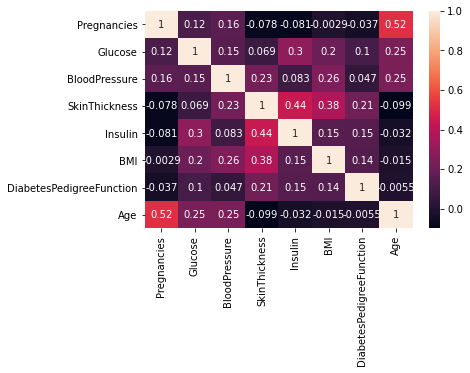

In [ ]:
import random
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

sns.heatmap(df.corr(), annot = True)


In [ ]:
from sklearn.model_selection import train_test_split 
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.15,random_state=50)
random.seed(1234)

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_tr, y_tr)

GaussianNB()

In [ ]:
y_pred  =  classifier.predict(x_te)
print("y_pred")
print(y_pred)
print("y_te")
print(y_te)

y_pred
[1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0
 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1
 1 0 0 1 1 0 1 1 0]
y_te
[1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0
 1 0 0 1 1 0 1 1 0]


Confusion matrix : [[40  5]
 [ 8 30]]


Accuracy score : 0.84


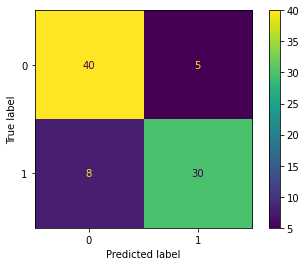

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
print('Confusion matrix :',confusion_matrix(y_te, y_pred))
print('\n')
print('Accuracy score : {:.2f}'.format(accuracy_score(y_te,y_pred)))
plot_confusion_matrix(classifier,x_te,y_te)

# Support Vector Machine 

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf')
svm_clf = clf.fit(x_tr,y_tr)

y_pred = svm_clf.predict(x_te)
print(y_pred)

[1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1
 1 0 0 1 1 0 1 1 0]


In [ ]:
print(y_te)

[1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0
 1 0 0 1 1 0 1 1 0]


[[41  4]
 [ 7 31]]


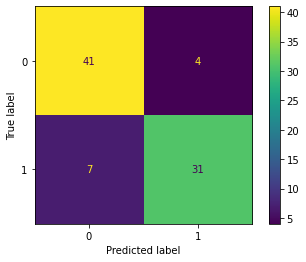

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
print(confusion_matrix(y_te,y_pred)) 
plot_confusion_matrix(clf,x_te,y_te)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy : {:.2f}'.format(accuracy_score(y_te,y_pred)))

Accuracy : 0.87


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(y_te, y_pred, average='weighted'))

0.8686101549053357


# Ada Boost classification

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
kfold = model_selection.KFold(n_splits=6, random_state=8)
clf = AdaBoostClassifier(n_estimators=20, random_state=8)
results = model_selection.cross_val_score(model, x_tr, y_tr, cv=kfold)

C:\Users\motur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
print(results)
print(results.mean())

[0.78205128 0.74358974 0.73076923 0.73076923 0.80519481 0.7012987 ]
0.748945498945499


In [ ]:
clf.fit(x_tr, y_tr)

AdaBoostClassifier(n_estimators=20, random_state=8)

In [ ]:
 y_pred=clf.predict(x_te)
print(y_pred)

[1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1
 0 0 0 1 1 0 1 1 0]


[[39  6]
 [ 9 29]]
Accuracy : 0.82


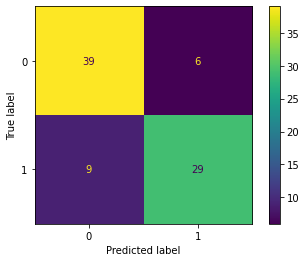

In [ ]:
print(confusion_matrix(y_te,y_pred))
plot_confusion_matrix(clf,x_te,y_te)
print('Accuracy : {:.2f}'.format(accuracy_score(y_te,y_pred)))

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_tr,y_tr)
y_pred = clf.predict(x_te)

print(y_pred)

[1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0
 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0
 1 0 0 1 1 0 1 1 0]


[[36  9]
 [ 9 29]]
Accuracy : 0.78


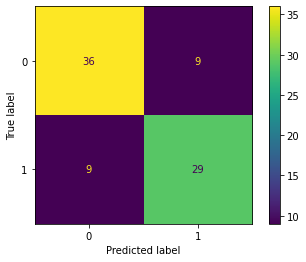

In [ ]:
print(confusion_matrix(y_te,y_pred))
plot_confusion_matrix(clf,x_te,y_te)
print('Accuracy : {:.2f}'.format(accuracy_score(y_te,y_pred)))

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=250)
clf.fit(x_tr,y_tr)
y_pred = clf.predict(x_te)
print(y_pred)

[1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0
 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1
 1 0 0 1 0 0 1 1 0]


[[38  7]
 [ 7 31]]
Accuracy : 0.83


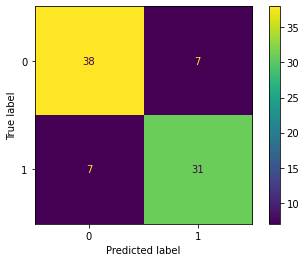

In [ ]:
print(confusion_matrix(y_te,y_pred))
plot_confusion_matrix(clf,x_te,y_te)
print('Accuracy : {:.2f}'.format(accuracy_score(y_te,y_pred)))

In [ ]:
Interpretation:
In daibetes dataset, as the columns have huge difference b/w one another,
I applied standard Scaler to the dataset(x i.e. independent variables).
And the dependent variable i.e. y is encoded using label encoder,thus
converting the labels into numeric form.
later we split the data into test and train sets.
After certian steps we apply various classification models on test and train data  and obtain accuracy Score for each model.

Acuracies of different Algorithms on diabetes dataset:
Naive Bayes - 0.84
Support Vector Machine - 0.87
Ada Boost - 0.82
Decision Tree - 0.78
Random Forest Classifier - 0.83